# Aufgabe 1

Algorithmen, Modelle und Performance-Metriken werden verglichen, um die bestmögliche Vorhersagbarkeit/Allgemeingültigkeit zu erreichen. Die Datenanalyse sollte dabei so gut dokumentiert werden, dass sie für andere nachvollziehbar und reproduzierbar wird. Um den Code auch auf anderen Systemen ausführen zu können, sollte die requirements.txt Datei für Python-Code angegeben werden

# Aufgabe 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from pathlib import Path

In [2]:
df = pd.read_csv(Path(r'../dataset/Bodyfat.csv'))
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Berechnung von Durchschnitt, Median (Mittlerer Wert), Quantil (x% der Daten sind kleiner als dieser Wert), Modus (Wert, der am Häufigsten vorkommt) und Spannweite (Differenz zwischen größtem und kleinstem Messwert)
Außerdem Berechung des größten und kleinsten Wertes, sowie der Standardabweichung (Streubreite der Werte) und der Varianz.

In [3]:
df.describe()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [4]:
modus = df.mode().iloc[0]
data_range = np.max(df, axis=0) - np.min(df, axis=0)
var = df.var()
statss = pd.concat([data_range,var],axis=1)
statss.rename(columns= {0: 'Range', 1: 'Variance'},inplace=True)
statss = pd.concat([statss, modus], axis=1)
statss.rename(columns= {0: 'Modus'},inplace=True)
statss

,Range,Variance,Modus
Density,0.1139,0.000362,1.061
bodyfat,47.5000,70.035816,20.400
Age,59.0000,158.811405,40.000
Weight,244.6500,863.722719,152.250
Height,48.2500,13.416513,71.500
Neck,20.1000,5.909339,38.500
Chest,56.9000,71.072918,99.100
Abdomen,78.7000,116.274745,88.700
Hip,62.7000,51.323722,98.300
Thigh,40.1000,27.561996,58.900


Plots der Quantile am Beispiel Alter

Text(0.5, 0, 'Age in years')

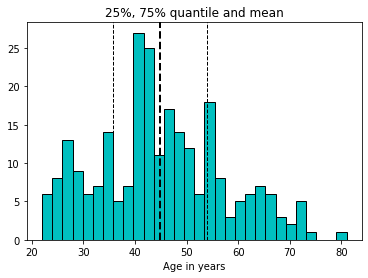

In [5]:
result = plt.hist(df['Age'], bins=30, color='c', edgecolor='k', label=True)

plt.axvline(df['Age'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].quantile(q=0.25), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Age'].quantile(q=0.75), color='k', linestyle='dashed', linewidth=1)
plt.title('25%, 75% quantile and mean')
plt.xlabel('Age in years')

Plots der Daten

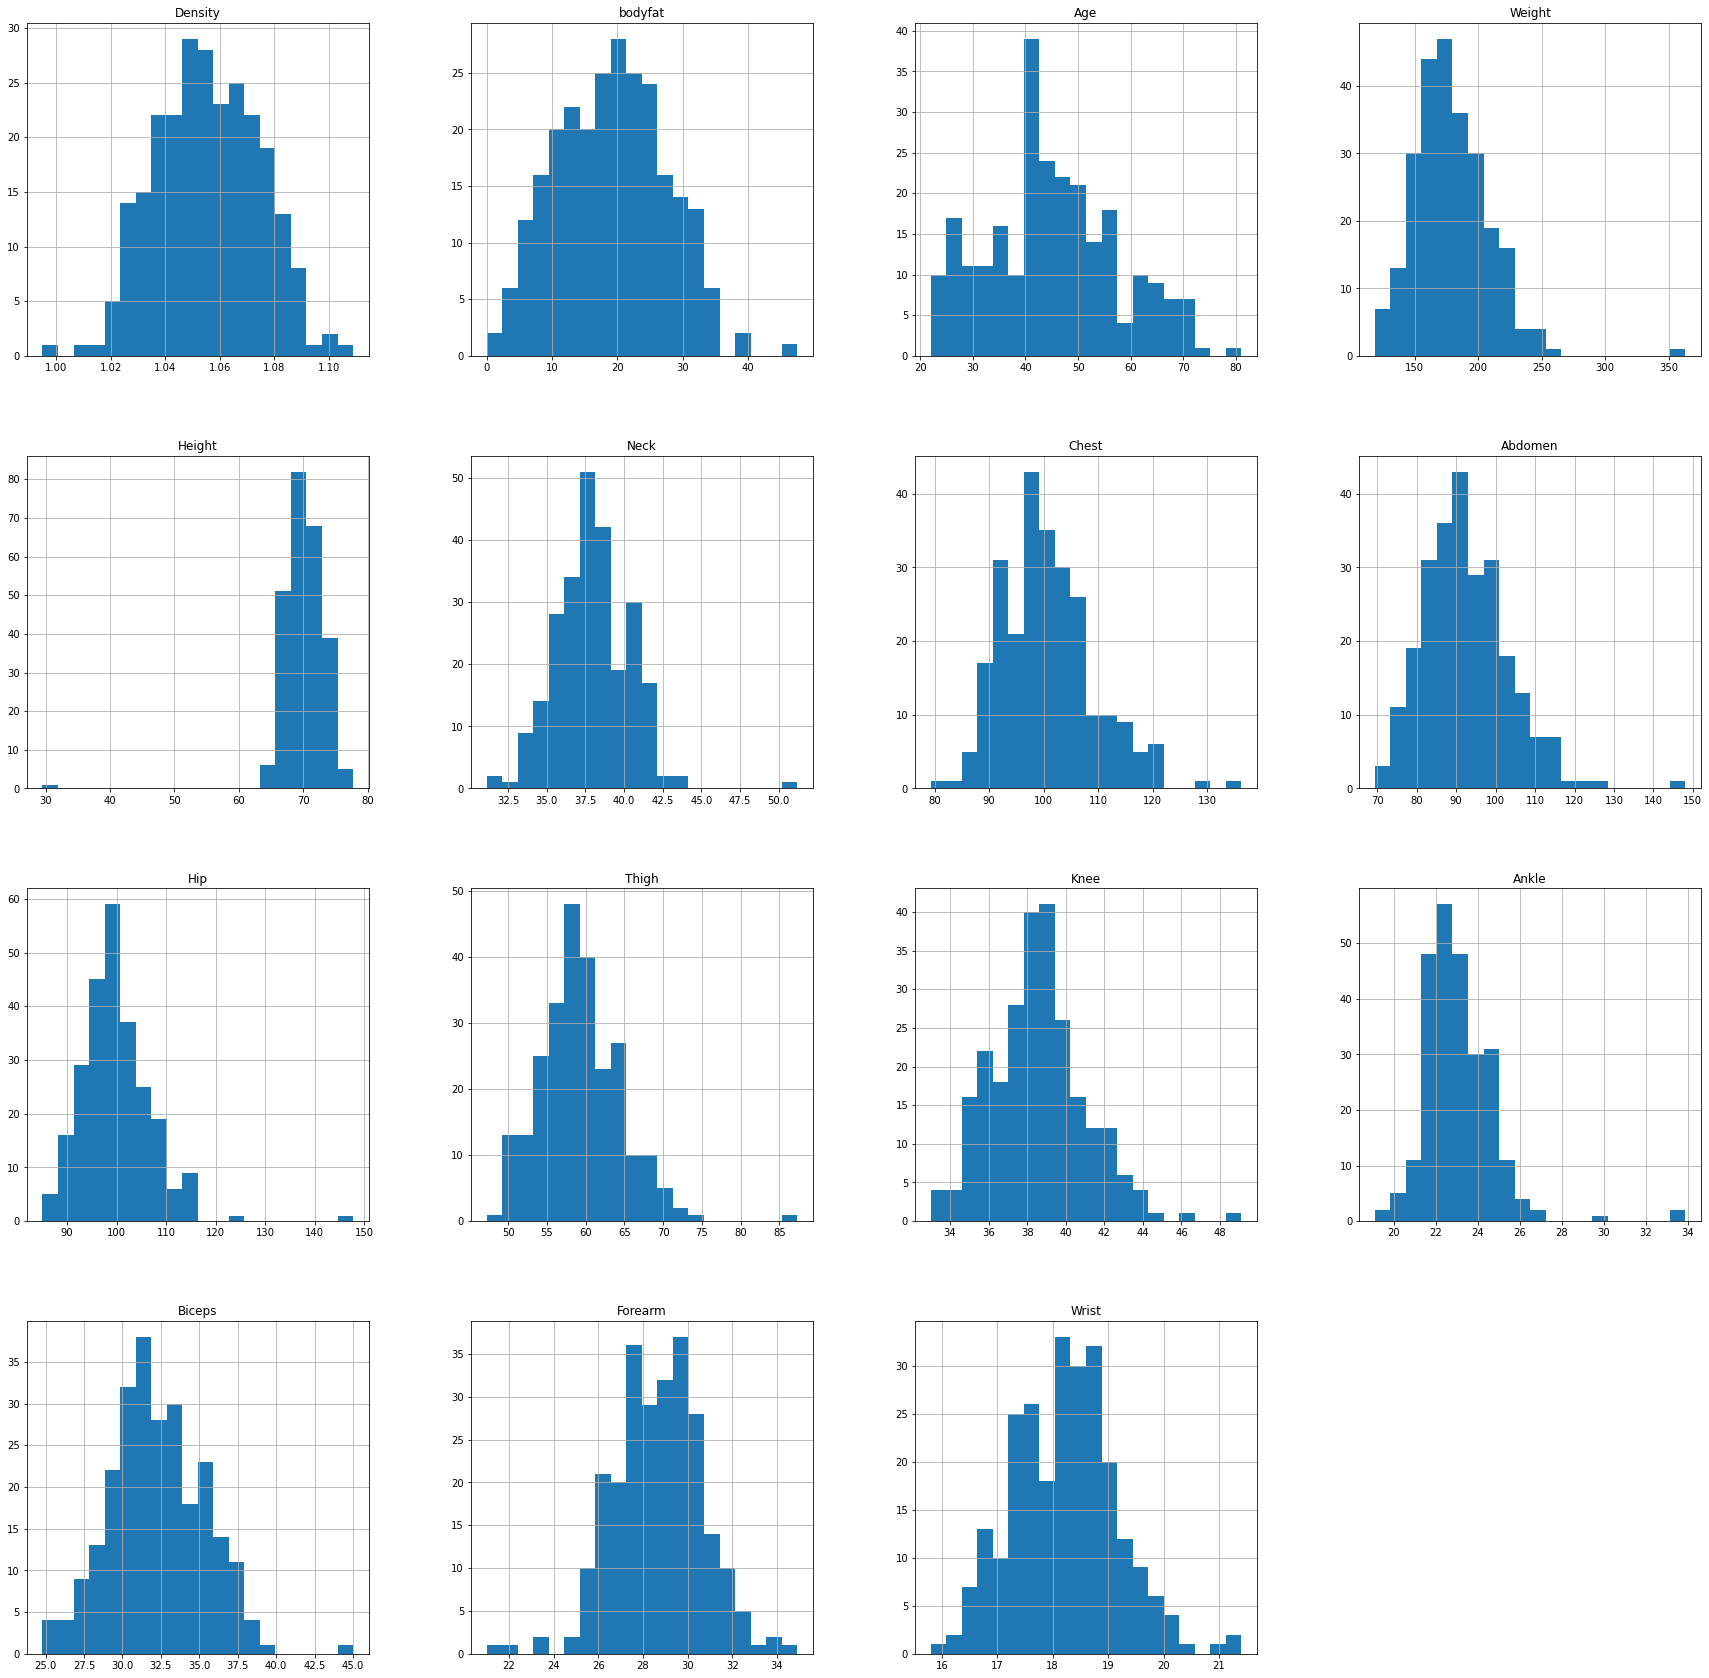

In [6]:
df.hist(bins=20, figsize=(30,30))
plt.show()

### Erkennung von Ausreißern

Ausreißer sind Datenpunkte, die sich signifikant von der Mehrheit der anderen Datenpunkte unterscheiden. Gründe für Ausreißer können Messfehler (sowohl durch den Menschen als auch durch fehlerhafte Messgeräte) sein, sie können aber auch natürlich durch die Variabilität in den Daten oder bei der Datenverarbeitung entstehen.

Insbesondere der Durchschnitt, die Varianz und die Standardabweichung werden durch Ausreißer beeinflusst, da sie mit allen Datenpunkten berechnet werden. Quantile, Median und Modus sind dagegen robust gegen Ausreißer, da sie sich aus den mittleren Beobachtungen ergeben. Natürlich werden auch Spannweite, der kleinste und der größte Messwert durch Ausreißer beeinflusst, da Ausreißer meist genau diesen entsprechen.

Ausreißer erhöhen die Varianz in den Daten und verringern dadurch die Aussagekraft statistischer Methoden. Sie können außerdem zu Bias führen und damit die Vorhersagen statistischer Methoden beeinflussen.

Zur Erkennung von Ausreißern gibt es viele Methoden. Eine dieser Methoden ist die Visualisierung der Daten, wie oben in den Histogrammen. Datenpunkte, die weit von der Mehrheit entfernt liegen, sind Ausreißer.

Eine weitere Möglichkeit zur Ausreißererkennung ist der Z-Score (Z-Score = (Datenpunkt - Durchschnitt) / Standardabweichung)). Er gibt an, "wie viele Standardabweichungen der Datenpunkt vom Durchschnitt entfernt ist". Ab einem Z-Score von >3 bzw. < -3 wird ein Datenpunkt meist als Ausreißer betrachtet. Im folgenden wird der Z-Score für den Datensatz berechnet und die daraus resultierenden Ausreißer ausgegeben. Da die Ausreißer sehr signifikant vom Durchschnitt abweichen (siehe Histogramme), sollten sie für die weitere Analyse entfernt werden.

In [7]:
inliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
outliers = pd.concat([df,inliers]).drop_duplicates(keep=False)
outliers

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
30,1.0716,11.9,32,182.00,73.75,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
41,1.0250,32.9,44,205.00,29.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
85,1.0386,26.6,67,167.00,67.50,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
158,1.0704,12.5,30,136.50,68.75,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
174,1.0414,25.3,36,226.75,71.75,41.5,115.3,108.8,114.4,69.2,42.4,24.0,35.4,21.0,20.1
215,0.9950,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
225,1.0703,12.5,55,126.50,66.75,33.4,88.8,78.2,87.5,50.8,33.0,19.7,25.3,22.0,15.8
243,1.0256,32.6,67,227.75,72.75,41.3,115.8,113.4,109.8,65.6,46.0,25.4,35.3,29.8,19.5


Für eine noch strengere Erkennung von Ausreißern können nur die Datenpunkte verwendet werden, die zwischen dem x% und (1-x)%- Quantil liegen. Andere Methoden sind k-Nearest-Neighbours oder Neuronale Netze.

Neben Ausreißern können auch die Wahl des Modells, die Parameterwahl in diesem Modell, Regularisierung und Noise in den Daten die Genauigkeit des Modells beeinflussen